In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import cartopy as cp
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs

In [2]:
plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [3]:
radon_table = pd.read_csv('data_files\RadonNI.csv')

In [4]:
radon_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tile    14720 non-null  object
 1   class   14720 non-null  int64 
 2   x       14720 non-null  int64 
 3   y       14720 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 460.1+ KB


In [5]:
radon_table.head(10)

Tile  class       x       y
0  D1053      1  310500  453500
1  D1153      1  311500  453500
2  D1253      1  312500  453500
3  D0952      2  309500  452500
4  D1052      2  310500  452500
5  D1152      2  311500  452500
6  D1252      2  312500  452500
7  D1352      2  313500  452500
8  D1452      2  314500  452500
9  D1552      1  315500  452500

In [6]:
radon_table['class'].describe()

count    14720.000000
mean         2.682541
std          1.541938
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: class, dtype: float64

In [7]:
radon_table.tail(10)

Tile  class       x       y
14710  H9010      3  290500  310500
14711  H9110      3  291500  310500
14712  J2410      3  324500  310500
14713  J2510      3  325500  310500
14714  J2610      5  326500  310500
14715  J2710      5  327500  310500
14716  J2810      4  328500  310500
14717  J2910      4  329500  310500
14718  J2609      4  326500  309500
14719  J2709      4  327500  309500

In [8]:
radon_table.shape # 14720 rows and 4 columns

(14720, 4)

In [9]:
radon_table["class"]

0        1
1        1
2        1
3        2
4        2
        ..
14715    5
14716    4
14717    4
14718    4
14719    4
Name: class, Length: 14720, dtype: int64

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

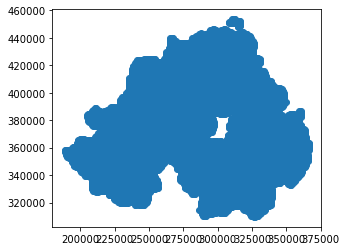

In [10]:
pts = [Point(row['x'], row['y']) for id, row in radon_table[['x', 'y']].iterrows()]
pts = gpd.GeoSeries(pts, crs='+init=epsg:29902')
pts.plot();
pts.crs

In [11]:
radon_gdf = gpd.GeoDataFrame(radon_table, geometry=gpd.points_from_xy(radon_table.x, radon_table.y), crs='+init=epsg:29902')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [12]:
radon_gdf.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [13]:
radon_gdf.to_file('data_files/RadonNI.shp')

In [14]:
radon = gpd.read_file('data_files/RadonNI.shp') # load the radon shapefile

<AxesSubplot:>

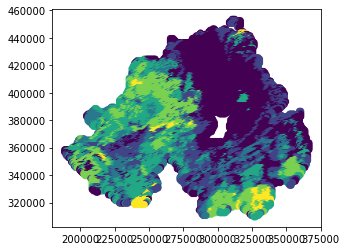

In [15]:
radon.plot('class')

<AxesSubplot:>

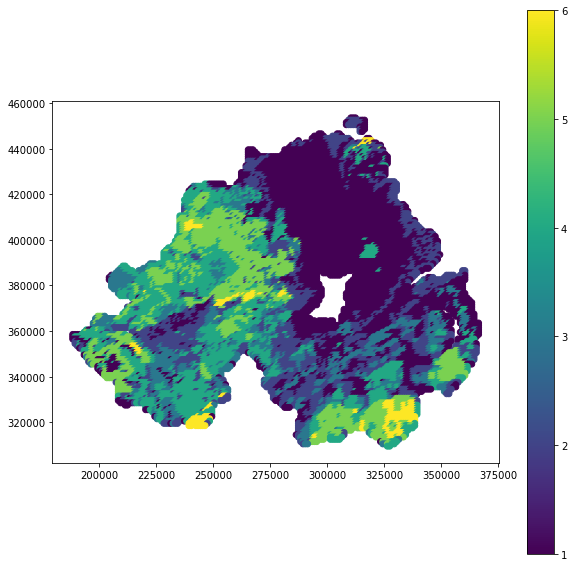

In [16]:
%matplotlib inline
radon.plot(column='class', cmap=None, legend=True, figsize=(10, 10))

In [17]:
counties_orig = gpd.read_file('data_files/Counties.shp') # load the Counties shapefile

In [18]:
counties_orig.columns

Index(['COUNTY_ID', 'CountyName', 'Area_SqKM', 'OBJECTID', 'geometry'], dtype='object')

In [19]:
counties_orig.head()

COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...

In [20]:
counties_orig.head()

COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...

In [21]:
divisions = counties_orig['CountyName'].tolist() # Get a list of a particular column (Counties)
print(divisions)

['TYRONE', 'ANTRIM', 'ARMAGH', 'FERMANAGH', 'LONDONDERRY', 'DOWN']


<AxesSubplot:>

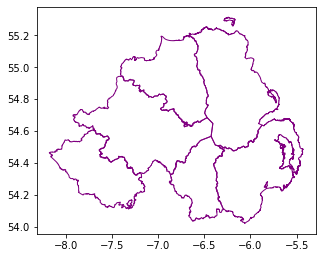

In [22]:
counties_orig.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

<AxesSubplot:>

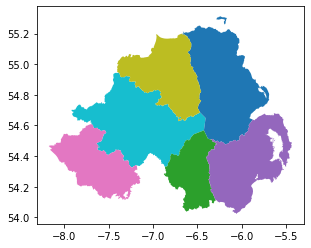

In [23]:
counties_orig.plot('CountyName')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


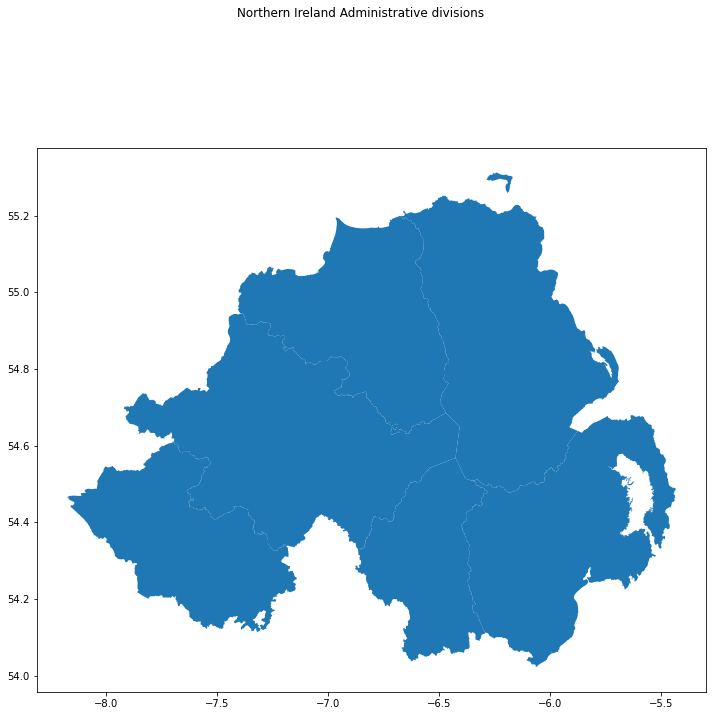

In [24]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = counties_orig.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show('CountyName')

In [25]:
radon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [26]:
counties_orig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
counties = counties_orig.to_crs(epsg=29902)

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


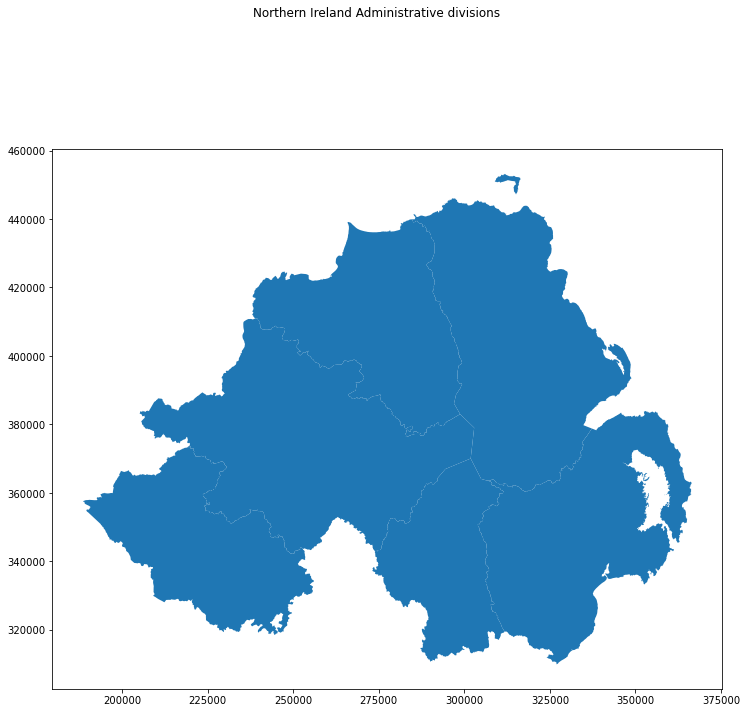

In [28]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = counties.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show('CountyName')

# Note the difference in the X, Y values above.

In [29]:
print(radon.crs == counties.crs) 

True


In [30]:
radon_counties = gpd.sjoin(counties, radon, how='inner', lsuffix='left', rsuffix='right') 

In [31]:
radon_counties

COUNTY_ID CountyName    Area_SqKM  OBJECTID  \
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
..        ...        ...          ...       ...   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   

                                             geometry  index_right   Tile  \
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11267  H7546   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11268  H7646   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11109  H7647   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11723  H7343   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11724  H7443   
..                                                ...          ...    ...   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8630  J2662   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8631  J2762   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8612  J0862   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8445  J0863   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8444  J0763   

    class       x       y  
0       4  275500  346500  
0       3  276500  346500  
0       2  276500  347500  
0       3  273500  343500  
0       3  274500  343500  
..    ...     ...     ...  
5       1  326500  362500  
5       1  327500  362500  
5       3  308500  362500  
5       1  308500  363500  
5       1  307500  363500  

[13855 rows x 10 columns]

In [32]:
radon_counties.shape

(13855, 10)

In [33]:
radon_counties.info() #summary

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13855 entries, 0 to 5
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   COUNTY_ID    13855 non-null  int64   
 1   CountyName   13855 non-null  object  
 2   Area_SqKM    13855 non-null  float64 
 3   OBJECTID     13855 non-null  int64   
 4   geometry     13855 non-null  geometry
 5   index_right  13855 non-null  int64   
 6   Tile         13855 non-null  object  
 7   class        13855 non-null  int64   
 8   x            13855 non-null  int64   
 9   y            13855 non-null  int64   
dtypes: float64(1), geometry(1), int64(6), object(2)
memory usage: 1.2+ MB


In [34]:
radon_counties_gdf = gpd.GeoDataFrame(radon_counties, geometry=gpd.points_from_xy(radon_counties.x, radon_counties.y), crs='+init=epsg:29902')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [35]:
radon_counties_gdf.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [36]:
radon_counties_gdf.to_file('data_files/radon_counties.shp')

<ipython-input-36-8b5cdeb1f0d6>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  radon_counties_gdf.to_file('data_files/radon_counties.shp')


In [37]:
radon_counties = gpd.read_file('data_files/radon_counties.shp') # load the radon-counties shapefile

In [38]:
radon_counties

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
0              6     TYRONE  3265.796622         1       11267  H7546      4   
1              6     TYRONE  3265.796622         1       11268  H7646      3   
2              6     TYRONE  3265.796622         1       11109  H7647      2   
3              6     TYRONE  3265.796622         1       11723  H7343      3   
4              6     TYRONE  3265.796622         1       11724  H7443      3   
...          ...        ...          ...       ...         ...    ...    ...   
13850          3       DOWN  2491.238606         6        8630  J2662      1   
13851          3       DOWN  2491.238606         6        8631  J2762      1   
13852          3       DOWN  2491.238606         6        8612  J0862      3   
13853          3       DOWN  2491.238606         6        8445  J0863      1   
13854          3       DOWN  2491.238606         6        8444  J0763      1   

            x       y                       geometry  
0      275500  346500  POINT (275500.000 346500.000)  
1      276500  346500  POINT (276500.000 346500.000)  
2      276500  347500  POINT (276500.000 347500.000)  
3      273500  343500  POINT (273500.000 343500.000)  
4      274500  343500  POINT (274500.000 343500.000)  
...       ...     ...                            ...  
13850  326500  362500  POINT (326500.000 362500.000)  
13851  327500  362500  POINT (327500.000 362500.000)  
13852  308500  362500  POINT (308500.000 362500.000)  
13853  308500  363500  POINT (308500.000 363500.000)  
13854  307500  363500  POINT (307500.000 363500.000)  

[13855 rows x 10 columns]

In [39]:
print(radon_counties.groupby(['CountyName', 'class'])['class'].count()) # summarize the radon distribution by CountyName

CountyName   class
ANTRIM       1        2448
             2         397
             3           7
             4          96
             5           1
             6          11
ARMAGH       1         327
             2         434
             3         283
             4         103
             5         138
             6           3
DOWN         1         656
             2         568
             3         501
             4         331
             5         300
             6         139
FERMANAGH    1         113
             2         273
             3         349
             4         745
             5         305
             6          39
LONDONDERRY  1         964
             2         241
             3         174
             4         303
             5         422
TYRONE       1         191
             2         518
             3         407
             4        1156
             5         836
             6          76
Name: class, dtype: int64


In [40]:
radon_counties.CountyName.describe()

count      13855
unique         6
top       TYRONE
freq        3184
Name: CountyName, dtype: object

In [60]:
radon_counties.groupby(['class']).count()

COUNTY_ID  CountyName  Area_SqKM  OBJECTID  index_righ  Tile     x  \
class                                                                       
1           4699        4699       4699      4699        4699  4699  4699   
2           2431        2431       2431      2431        2431  2431  2431   
3           1721        1721       1721      1721        1721  1721  1721   
4           2734        2734       2734      2734        2734  2734  2734   
5           2002        2002       2002      2002        2002  2002  2002   
6            268         268        268       268         268   268   268   

          y  geometry  
class                  
1      4699      4699  
2      2431      2431  
3      1721      1721  
4      2734      2734  
5      2002      2002  
6       268       268

<AxesSubplot:ylabel='CountyName'>

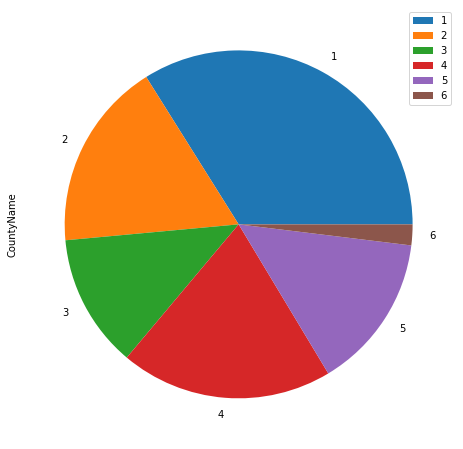

In [62]:
radon_counties.groupby(['class']).count().plot(kind='pie', y='CountyName', figsize=(8, 8))

In [42]:
radon_counties.groupby("CountyName")["class"].mean()

CountyName
ANTRIM         1.256081
ARMAGH         2.456522
DOWN           2.786774
FERMANAGH      3.533443
LONDONDERRY    2.514259
TYRONE         3.677136
Name: class, dtype: float64

In [43]:
print(radon_counties.groupby(['CountyName'])['class'].mean())

CountyName
ANTRIM         1.256081
ARMAGH         2.456522
DOWN           2.786774
FERMANAGH      3.533443
LONDONDERRY    2.514259
TYRONE         3.677136
Name: class, dtype: float64


In [44]:
radon_counties.groupby("CountyName").mean().sort_values(by = "class", ascending = False)

COUNTY_ID    Area_SqKM  OBJECTID    index_righ     class  \
CountyName                                                              
TYRONE             6.0  3265.796622       1.0   7004.829774  3.677136   
FERMANAGH          4.0  1850.832538       4.0  11370.660636  3.533443   
DOWN               3.0  2491.238606       6.0  10890.040481  2.786774   
LONDONDERRY        5.0  2118.316853       5.0   2655.370722  2.514259   
ARMAGH             2.0  1327.228438       3.0  12102.815217  2.456522   
ANTRIM             1.0  3097.847750       2.0   3355.223986  1.256081   

                         x              y  
CountyName                                 
TYRONE       253130.025126  374022.613065  
FERMANAGH    223566.885965  344410.635965  
DOWN         333823.046092  347807.815631  
LONDONDERRY  273890.209125  409728.136882  
ARMAGH       294173.913043  339005.434783  
ANTRIM       316042.567568  405103.378378

In [45]:
radon_counties.groupby("CountyName").mean().sort_values(by = "Area_SqKM", ascending = False)

COUNTY_ID    Area_SqKM  OBJECTID    index_righ     class  \
CountyName                                                              
TYRONE             6.0  3265.796622       1.0   7004.829774  3.677136   
ANTRIM             1.0  3097.847750       2.0   3355.223986  1.256081   
DOWN               3.0  2491.238606       6.0  10890.040481  2.786774   
LONDONDERRY        5.0  2118.316853       5.0   2655.370722  2.514259   
FERMANAGH          4.0  1850.832538       4.0  11370.660636  3.533443   
ARMAGH             2.0  1327.228438       3.0  12102.815217  2.456522   

                         x              y  
CountyName                                 
TYRONE       253130.025126  374022.613065  
ANTRIM       316042.567568  405103.378378  
DOWN         333823.046092  347807.815631  
LONDONDERRY  273890.209125  409728.136882  
FERMANAGH    223566.885965  344410.635965  
ARMAGH       294173.913043  339005.434783

In [46]:
print(radon_counties.groupby(['CountyName'])['Area_SqKM'].mean())

CountyName
ANTRIM         3097.847750
ARMAGH         1327.228438
DOWN           2491.238606
FERMANAGH      1850.832538
LONDONDERRY    2118.316853
TYRONE         3265.796622
Name: Area_SqKM, dtype: float64


In [47]:
county_tyrone = radon_counties[radon_counties.CountyName == "TYRONE"]
len(county_tyrone) # returns the number of radon data (data count) in county Tyrone

3184

In [48]:
county_tyrone

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
0             6     TYRONE  3265.796622         1       11267  H7546      4   
1             6     TYRONE  3265.796622         1       11268  H7646      3   
2             6     TYRONE  3265.796622         1       11109  H7647      2   
3             6     TYRONE  3265.796622         1       11723  H7343      3   
4             6     TYRONE  3265.796622         1       11724  H7443      3   
...         ...        ...          ...       ...         ...    ...    ...   
3179          6     TYRONE  3265.796622         1        2414  C3910      4   
3180          6     TYRONE  3265.796622         1        2411  C3610      4   
3181          6     TYRONE  3265.796622         1        2412  C3710      4   
3182          6     TYRONE  3265.796622         1        2725  C4307      5   
3183          6     TYRONE  3265.796622         1        2622  C4408      5   

           x       y                       geometry  
0     275500  346500  POINT (275500.000 346500.000)  
1     276500  346500  POINT (276500.000 346500.000)  
2     276500  347500  POINT (276500.000 347500.000)  
3     273500  343500  POINT (273500.000 343500.000)  
4     274500  343500  POINT (274500.000 343500.000)  
...      ...     ...                            ...  
3179  239500  410500  POINT (239500.000 410500.000)  
3180  236500  410500  POINT (236500.000 410500.000)  
3181  237500  410500  POINT (237500.000 410500.000)  
3182  243500  407500  POINT (243500.000 407500.000)  
3183  244500  408500  POINT (244500.000 408500.000)  

[3184 rows x 10 columns]

<AxesSubplot:>

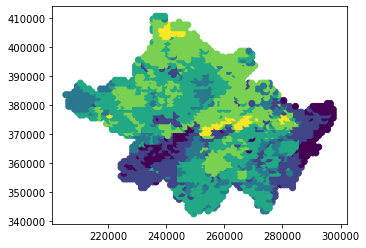

In [49]:
county_tyrone.plot('class')

<AxesSubplot:>

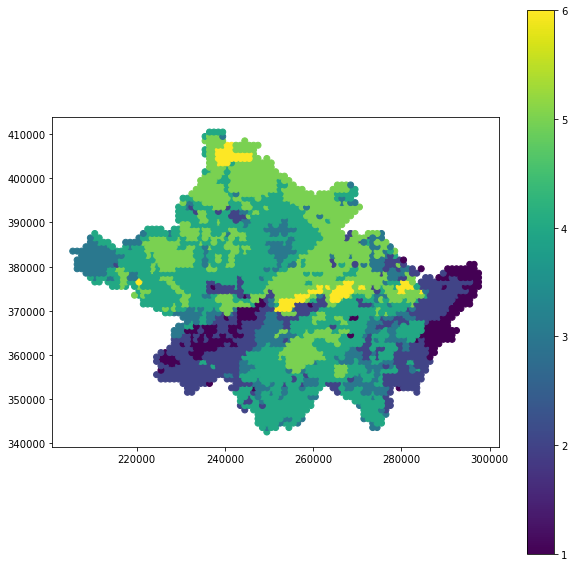

In [50]:
county_tyrone.plot(column='class', cmap=None, legend=True, figsize=(10, 10))

In [51]:
county_tyrone.loc[[county_tyrone["class"].idxmax(), county_tyrone["class"].idxmin()]]

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
413          6     TYRONE  3265.796622         1        6873  H8474      6   
81           6     TYRONE  3265.796622         1       10280  H7952      1   

          x       y                       geometry  
413  284500  374500  POINT (284500.000 374500.000)  
81   279500  352500  POINT (279500.000 352500.000)

In [52]:
print(county_tyrone.groupby(['class'])['class'].count()) # summarize the radon distribution in County Tyrone

class
1     191
2     518
3     407
4    1156
5     836
6      76
Name: class, dtype: int64


In [53]:
tyrone_class_count = county_tyrone.groupby(['class'])['class'].count() # obtain the counts of each class in County Tyrone
tyrone_class_count

class
1     191
2     518
3     407
4    1156
5     836
6      76
Name: class, dtype: int64

In [54]:
tyrone_class_percent = (county_tyrone.groupby(['class'])['class'].count() * 100 / 3265.796622) # summarize the radon distribution by CountyName
tyrone_class_percent

class
1     5.848496
2    15.861367
3    12.462503
4    35.397183
5    25.598655
6     2.327150
Name: class, dtype: float64

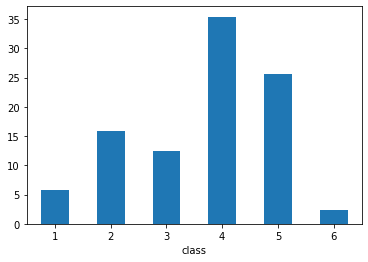

In [55]:
ax = tyrone_class_percent.plot.bar(x='lab', y='val', rot=0)

In [56]:
radon_tyrone = radon_counties[radon_counties["CountyName"] == "TYRONE"]
radon_tyrone

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
0             6     TYRONE  3265.796622         1       11267  H7546      4   
1             6     TYRONE  3265.796622         1       11268  H7646      3   
2             6     TYRONE  3265.796622         1       11109  H7647      2   
3             6     TYRONE  3265.796622         1       11723  H7343      3   
4             6     TYRONE  3265.796622         1       11724  H7443      3   
...         ...        ...          ...       ...         ...    ...    ...   
3179          6     TYRONE  3265.796622         1        2414  C3910      4   
3180          6     TYRONE  3265.796622         1        2411  C3610      4   
3181          6     TYRONE  3265.796622         1        2412  C3710      4   
3182          6     TYRONE  3265.796622         1        2725  C4307      5   
3183          6     TYRONE  3265.796622         1        2622  C4408      5   

           x       y                       geometry  
0     275500  346500  POINT (275500.000 346500.000)  
1     276500  346500  POINT (276500.000 346500.000)  
2     276500  347500  POINT (276500.000 347500.000)  
3     273500  343500  POINT (273500.000 343500.000)  
4     274500  343500  POINT (274500.000 343500.000)  
...      ...     ...                            ...  
3179  239500  410500  POINT (239500.000 410500.000)  
3180  236500  410500  POINT (236500.000 410500.000)  
3181  237500  410500  POINT (237500.000 410500.000)  
3182  243500  407500  POINT (243500.000 407500.000)  
3183  244500  408500  POINT (244500.000 408500.000)  

[3184 rows x 10 columns]

In [57]:
radon_tyrone.to_file('data_files/radon_tyrone.shp')

<AxesSubplot:>

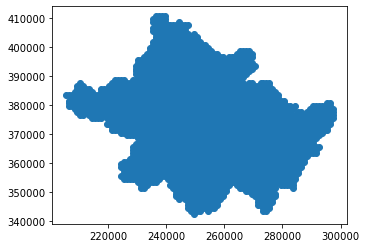

In [58]:
radon_tyrone.plot()

In [63]:
radon_tyrone_gdf = gpd.GeoDataFrame(radon_tyrone, geometry=gpd.points_from_xy(radon_tyrone.x, radon_tyrone.y), crs='+init=epsg:29902')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [64]:
radon_gdf.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [65]:
radon_tyrone_gdf.to_file('data_files/radon_tyrone.shp')

In [59]:
#repeat the column chart for all the counties or find a way to run this in one code.